In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
P4_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Participant-04.csv", sep=",")
P4_data 

,Start,Finish,Steps (count)
0,01-Jan-2022 00:00,01-Jan-2022 01:00,0.0
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0
...,...,...,...
6018,08-Sep-2022 17:00,08-Sep-2022 18:00,537.0
6019,08-Sep-2022 18:00,08-Sep-2022 19:00,188.0
6020,08-Sep-2022 19:00,08-Sep-2022 20:00,215.0
6021,08-Sep-2022 20:00,08-Sep-2022 21:00,727.0


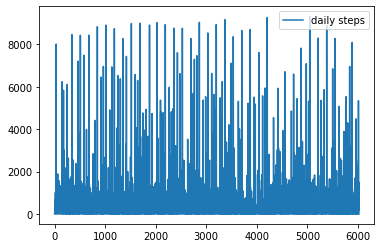

In [5]:
y = P4_data['Steps (count)']
# x = np.linspace(0,6133)
plt.plot(y,label = 'daily steps')
plt.legend()
plt.show()

In [6]:
P4_data['Steps (count)'].fillna(0,inplace = True)
data04 = P4_data.drop(['Start'],axis = 1)
data04

,Finish,Steps (count)
0,01-Jan-2022 01:00,0.0
1,01-Jan-2022 02:00,0.0
2,01-Jan-2022 03:00,0.0
3,01-Jan-2022 04:00,0.0
4,01-Jan-2022 05:00,0.0
...,...,...
6018,08-Sep-2022 18:00,537.0
6019,08-Sep-2022 19:00,188.0
6020,08-Sep-2022 20:00,215.0
6021,08-Sep-2022 21:00,727.0


In [7]:
Date = data04['Finish']
# for i in range(count(Date))
dates= []
p = len(Date)
i = 0
for i in range(p):
  Date[i] = Date[i][0:11]
  dates.append(Date[i])
# dates

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [8]:
data04['Finish'] = data04['Finish'].apply(pd.to_datetime)
data04
# print(type(data07['Finish']))

,Finish,Steps (count)
0,2022-01-01,0.0
1,2022-01-01,0.0
2,2022-01-01,0.0
3,2022-01-01,0.0
4,2022-01-01,0.0
...,...,...
6018,2022-09-08,537.0
6019,2022-09-08,188.0
6020,2022-09-08,215.0
6021,2022-09-08,727.0


In [9]:
weeksum = pd.DataFrame(data04.resample('w',on = 'Finish')['Steps (count)'].sum()).reset_index()
weeksum.head(10)

,Finish,Steps (count)
0,2022-01-02,24106.000000
1,2022-01-09,71137.008341
2,2022-01-16,72000.345535
3,2022-01-23,76674.622074
4,2022-01-30,82644.880647
5,2022-02-06,72284.710790
6,2022-02-13,86215.376206
7,2022-02-20,83411.319657
8,2022-02-27,74467.556502
9,2022-03-06,74257.261975


In [10]:
import plotly.express as px
plot = px.box(weeksum,x ='Steps (count)')
plot.show()

In [11]:
fig = px.histogram(weeksum, x="Finish",y ='Steps (count)' ,nbins =len(weeksum),color_discrete_sequence=['indianred'])
fig.show()

In [13]:
W4 = weeksum.groupby([weeksum['Finish'].dt.isocalendar().week]).sum().rename_axis(['week']).reset_index()
W4.head(10)

,week,Steps (count)
0,1,71137.008341
1,2,72000.345535
2,3,76674.622074
3,4,82644.880647
4,5,72284.710790
5,6,86215.376206
6,7,83411.319657
7,8,74467.556502
8,9,74257.261975
9,10,76971.907148


In [ ]:
#W4.to_csv('/content/drive/MyDrive/Colab Notebooks/Participant07_new.csv',index= False,sep= ',')

In [14]:
fig = px.pie(W4, values='Steps (count)', names='week', title="Weeks of steps")
fig.show()

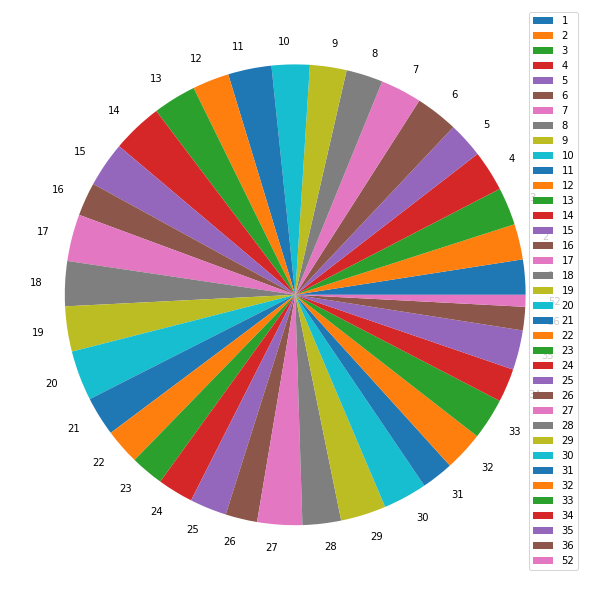

In [15]:
plt.pie(W4['Steps (count)'], labels =W4['week'])
plt.subplots_adjust(0.1,0,2,2)
plt.legend()
plt.show() 

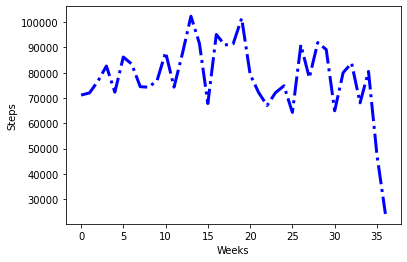

In [16]:
plt.plot(W4['Steps (count)'], color = 'blue', linewidth=3, linestyle='-.')
plt.xlabel("Weeks")
plt.ylabel("Steps")
plt.show()

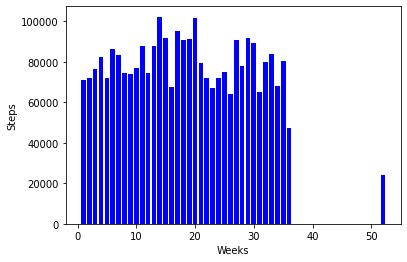

In [19]:
plt.bar(W4['week'],W4['Steps (count)'], color = 'blue', linewidth=3, linestyle='-.')
plt.xlabel("Weeks")
plt.ylabel("Steps")
plt.show() 